<a href="https://colab.research.google.com/github/Rafiprabowo/Pengolahan-Citra-dan-Visi-Komputer/blob/main/pertemuan-6/06_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pratikum pertemuan 6 Histogram Equalization
## Nama : Muhamad Rafi Prabowo
## NIM : 2141720239
## Kelas : TI 3D


# 1. Mount Drive


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# 2. Import Library

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


# 3. Membuat Histogram

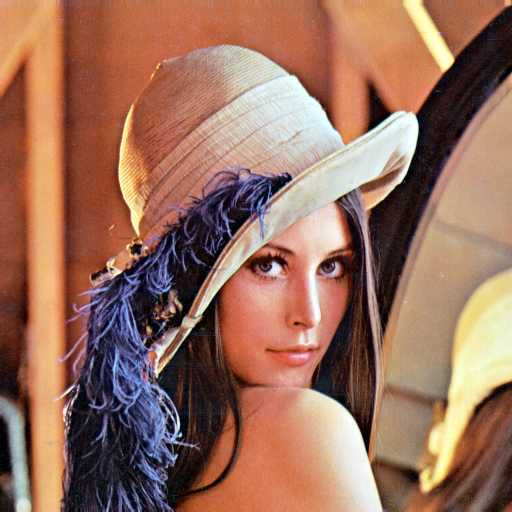

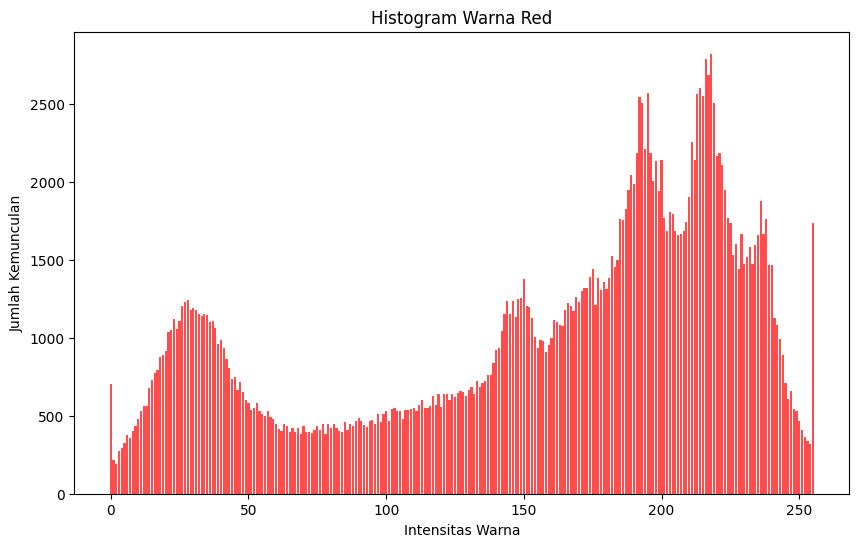

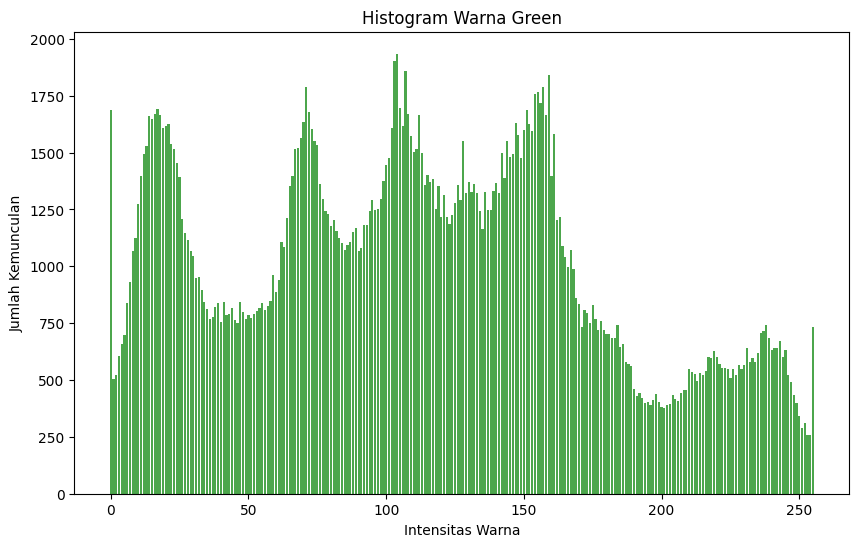

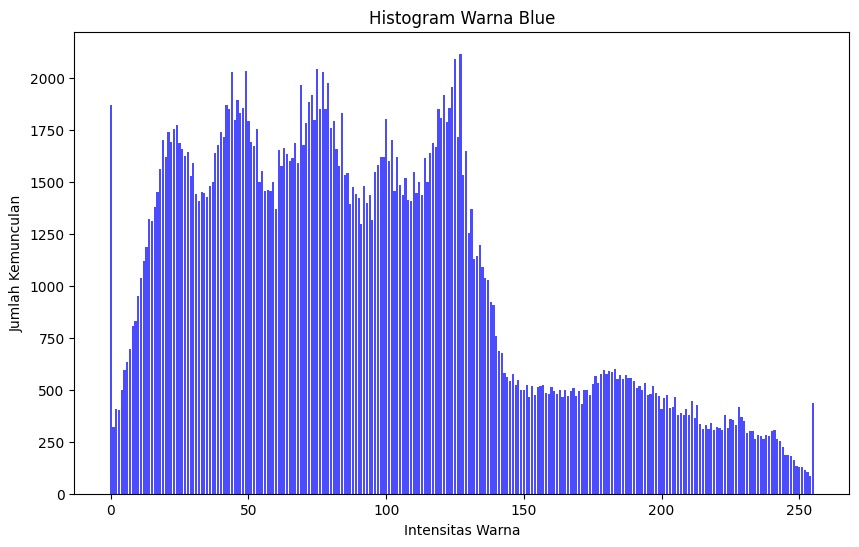

In [30]:
image = cv.imread('/content/drive/MyDrive/images/lena.jpeg')
cv2_imshow(image)
def pixel(image):
  red = {}
  green = {}
  blue = {}

  # Akses per pixel
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      b = int(image[y, x, 0])
      g = int(image[y, x, 1])
      r = int(image[y, x, 2])

      if r in red:
        red[r] += 1
      else:
        red[r] = 1

      if g in green:
        green[g] += 1
      else:
        green[g] = 1

      if b in blue:
        blue[b] += 1
      else:
        blue[b] = 1

  return red, green, blue

def histogram(intensitas, warna):
  plt.figure(figsize=(10, 6))
  plt.bar(intensitas.keys(), intensitas.values(), color=warna.lower(), alpha=0.7)
  plt.title(f'Histogram Warna {warna.capitalize()}')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

intensitas_merah, intensitas_hijau, intensitas_biru = pixel(image)
histogram(intensitas_merah, 'red')
histogram(intensitas_hijau, 'green')
histogram(intensitas_biru, 'blue')





# 4. Menampilkan Histogram dengan Library NumPY

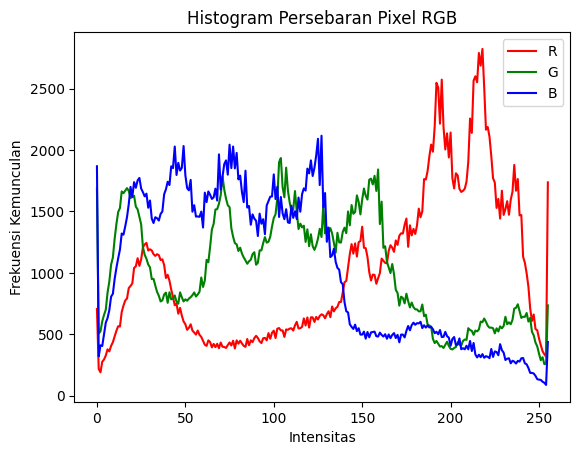

In [24]:
# Split the image into RGB channels
b, g, r = cv.split(image)

#calculate the histograms for each channel
r_hist = np.histogram(r.ravel(), bins=256, range=(0, 256))
g_hist = np.histogram(g.ravel(), bins=256, range=(0, 256))
b_hist = np.histogram(b.ravel(), bins=256, range=(0, 256))

#plot the histograms
plt.figure()
plt.title('Histogram Persebaran Pixel RGB')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi Kemunculan')

plt.plot(r_hist[1][:-1], r_hist[0], color='red', label= 'R' )
plt.plot(g_hist[1][:-1], g_hist[0], color='green', label= 'G' )
plt.plot(b_hist[1][:-1], b_hist[0], color='blue', label= 'B' )

plt.legend()
plt.show()





# 5. Menampilkan histogram dari gambar yang telah diproses dengan histogram equalization dan juga menampilkan gambar sebelum dan sesudah proses

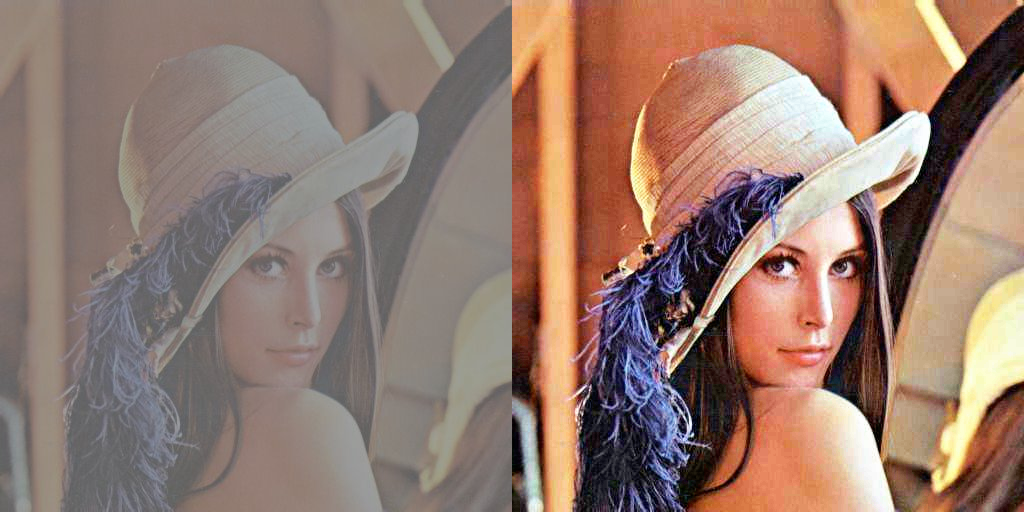

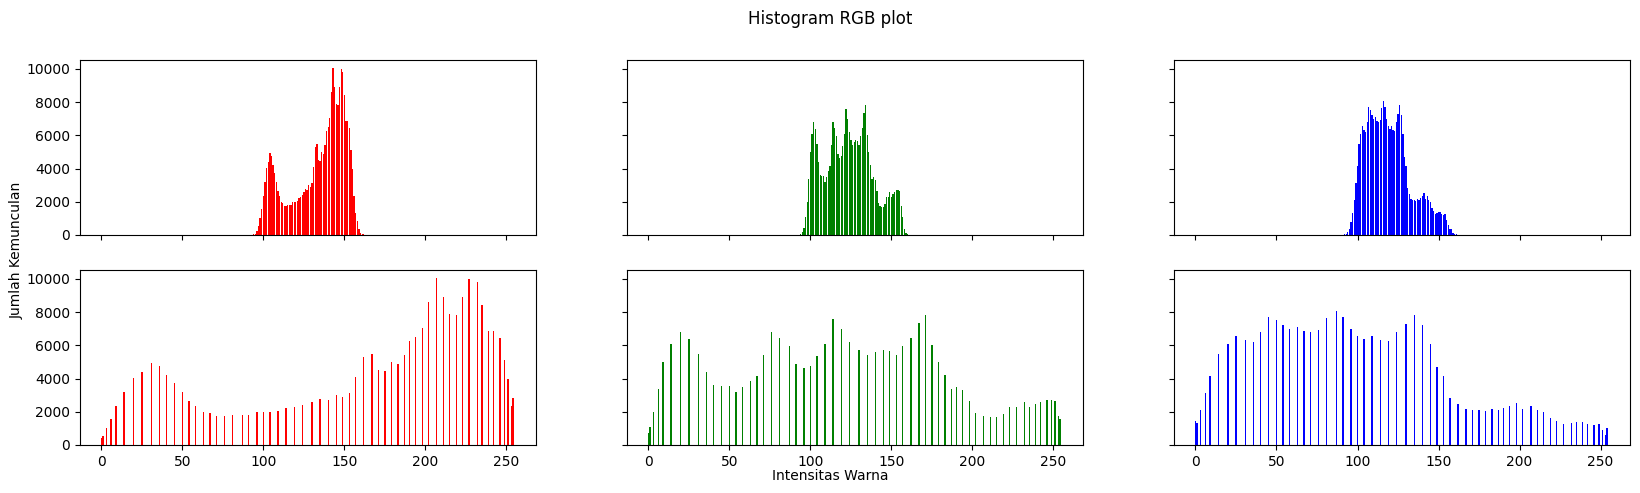

In [42]:
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3, 256))
  for y in range(0, height):
    for x in range(0, width):
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

img1 = image = cv.imread('/content/drive/MyDrive/images/lena-.jpeg')
histo_asli = histog(img1)

# Konversi ke Numpy array
img_array = np.asarray(img1)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalisais
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2))  # Menggabungkan gambar
cv2_imshow(final_frame)

color_ranges = np.arange(256)

# Mengonversi gambar asli menjadi grayscale
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

is_gray_img = np.array_equal(img1_gray, img2_gray)

if not is_gray_img:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(color_ranges, histo_asli[2], color='red')
    axs[0, 1].bar(color_ranges, histo_asli[1], color='green')
    axs[0, 2].bar(color_ranges, histo_asli[0], color='blue')
    axs[1, 0].bar(color_ranges, equal_histo[2], color='red')
    axs[1, 1].bar(color_ranges, equal_histo[1], color='green')
    axs[1, 2].bar(color_ranges, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(color_ranges, histo_asli[2], color='gray')
    axs[1].bar(color_ranges, equal_histo[2], color='gray')

plt.show()

# 6. Menampilkan Histogram menggunakan library CV2 "equalizeHist"


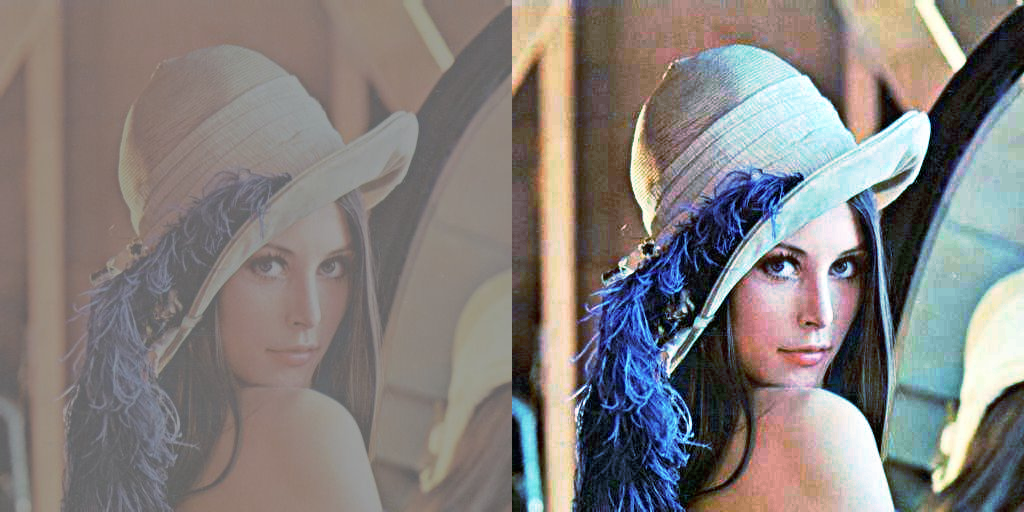

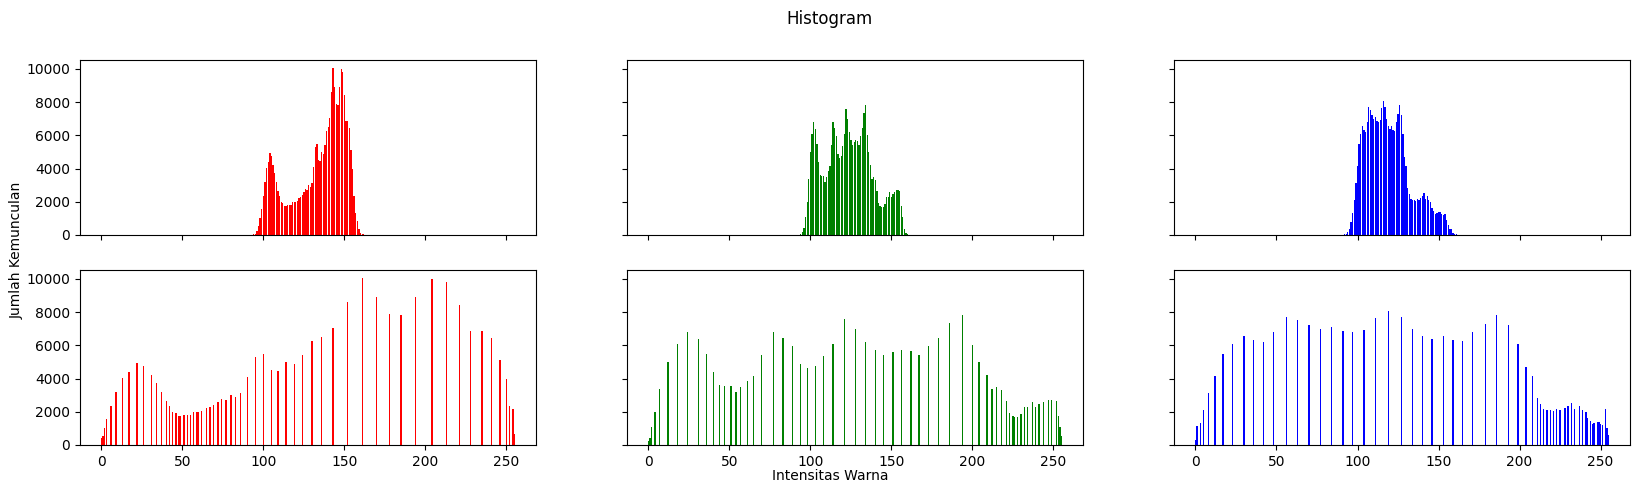

In [43]:
img1 = cv.imread('/content/drive/MyDrive/images/lena-.jpeg')

channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))

eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)

# Membuat plot histogram
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')

plt.show()  # Menampilkan plot histogram

# 7. Proses Pemetaan 16 Juta warna RGB kedalam 8 warna

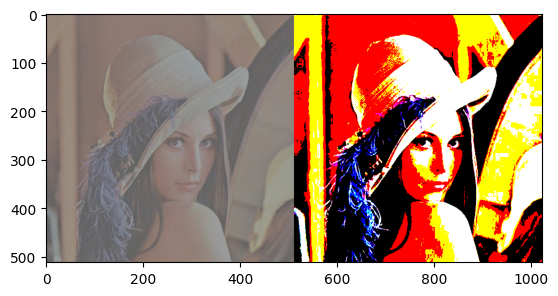

In [47]:
image = cv.imread('/content/drive/MyDrive/images/lena-.jpeg')

def warnaTerdekat (r,g,b):
    pValue = 0
    minDistance = 255*255 + 255*255 + 255*255 + 1
    warnaPalette = [[0,0,0],[255,0,0],[0,255,0],[255,255,0],[0,0,255],[0,255,255],[255,0,255],[255,255,255]]

    for i in range (len(warnaPalette)):
        distance = (r-warnaPalette[i][0])*(r-warnaPalette[i][0]) + (g-warnaPalette[i][1])*(g-warnaPalette[i][1]) + (b-warnaPalette[i][2])*(b-warnaPalette[i][2])
        if (distance < minDistance):
            minDistance = distance
            pValue = i
    return pValue

warnaPalette = [[0,0,0],[255,0,0],[0,255,0],[255,255,0],[0,0,255],[0,255,255],[255,0,255],[255,255,255]]
original = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img3 = np.zeros((original.shape[0], original.shape[1], 3), np.uint8)

for y in range (original.shape[0]):
    for x in range (original.shape[1]):
        baru = warnaTerdekat(original[y, x, 0], original[y, x, 1], original[y, x, 2])
        img3[y, x] = warnaPalette[baru]

final_frame = cv.hconcat((original, img3)) #concatenate image
plt.imshow(final_frame)

# 8. Dithering Floyd dan Steinberg

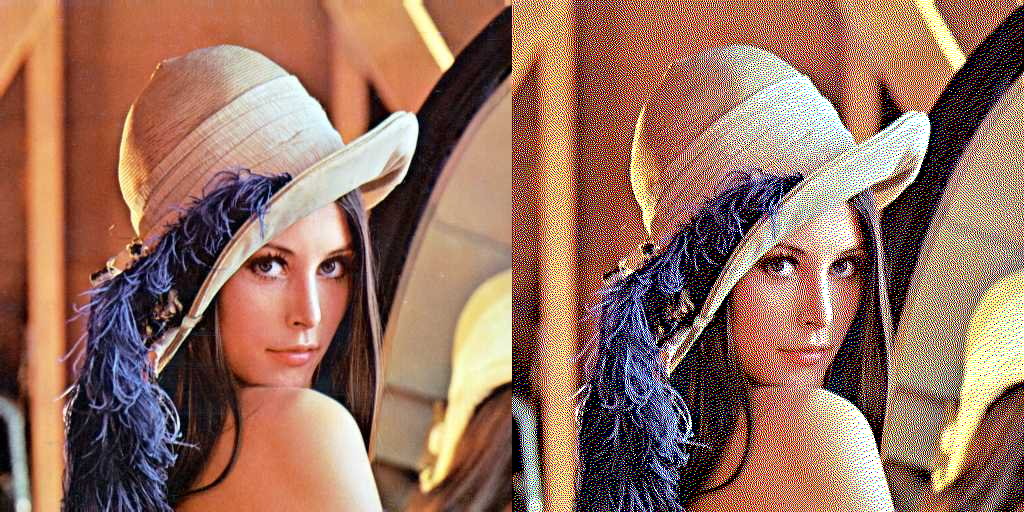

In [51]:
img1 = cv.imread('/content/drive/MyDrive/images/lena.jpeg')
# Konversi ke tipe float
img_float = np.float64(img1)

# Ukuran gambar
height, width, channels = img1.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi kembali ke tipe uint8
output_img = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
final_frame = cv.hconcat((img1, output_img))
cv2_imshow(final_frame)

# 9. Mengunbah lena.jpeg menjadi grey image dan menerapkan histogram equalization dan setelah itu implementasikan proses dithering Floyd dan Steinberg

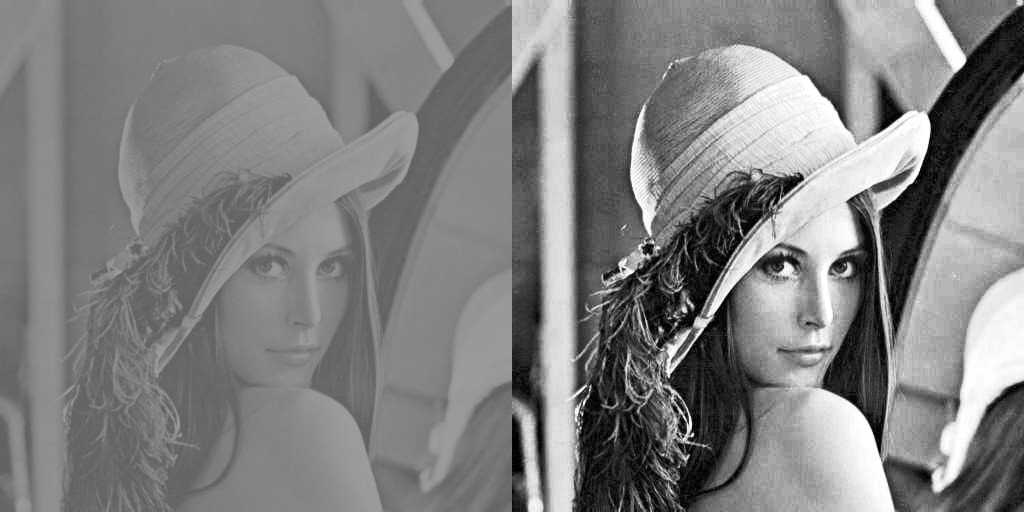

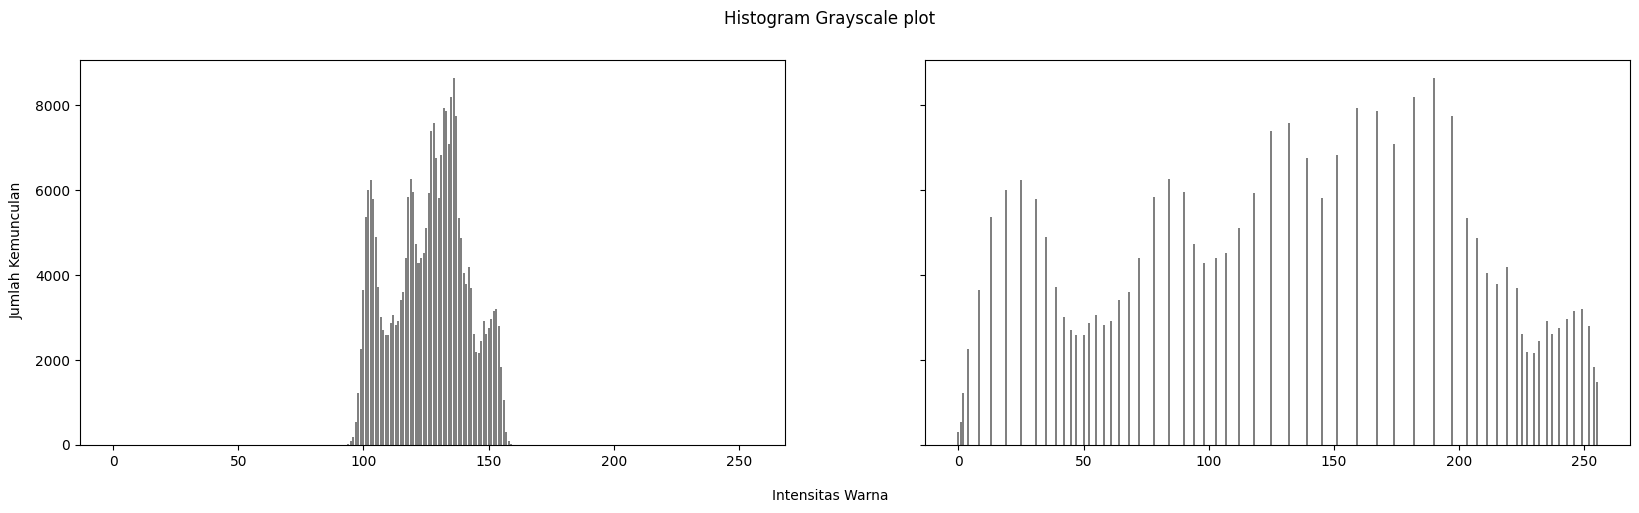

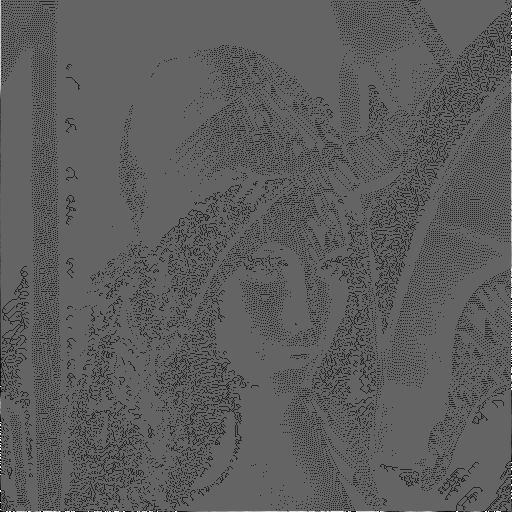

In [54]:
# Baca citra asli
image = cv.imread("/content/drive/MyDrive/images/lena-.jpeg", cv.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
final_frame = cv.hconcat((image, equalized_image))
cv2_imshow(final_frame)

plt.show()
cv2_imshow(dithered_image)
